# COVID and Ontario Licensed Child Care


In [2]:
import pandas as pd
import datetime
import io
from io import StringIO
import os
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

%matplotlib inline
# import naming conventions 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
url = 'https://data.ontario.ca/dataset/5bf54477-6147-413f-bab0-312f06fcb388/resource/eee282d3-01e6-43ac-9159-4ba694757aea/download/lccactivecovid.csv'
response = requests.get(url)
s = requests.get(url).text
covid_df = pd.read_csv(StringIO(s))

## Toronto (new cases per date)

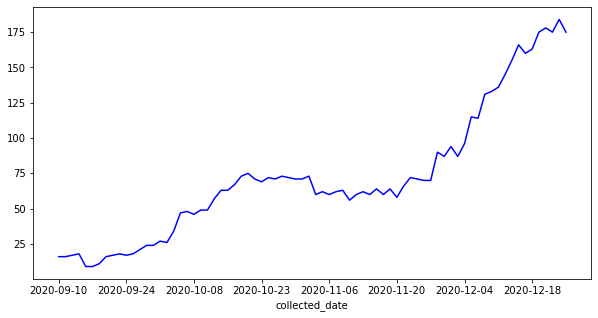

In [4]:
covid_tor_df = covid_df.loc[(covid_df['municipality'] == 'Toronto')]
covid_tor_df.set_index('collected_date')
covid_sum_tor = covid_tor_df.groupby('collected_date')['total_confirmed_cases'].sum().to_frame(name='sum')
covid_sum_tor
covid_sum_tor['sum'].plot(figsize=(10,5),kind='line', color='b')

## All municipalities in Ontario (inclusive of Toronto; new cases per date)

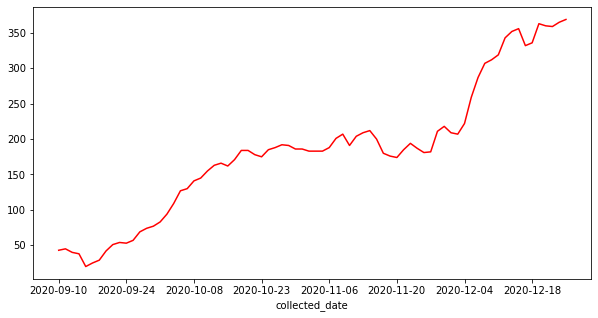

In [5]:
covid_all_df = covid_df
covid_all_df.set_index('collected_date')
covid_sum_all = covid_all_df.groupby('collected_date')['total_confirmed_cases'].sum().to_frame(name='sum')
covid_sum_all['sum'].plot(figsize=(10,5),kind='line', color='r')

In [6]:
covid_tor_df.head()

,collected_date,reported_date,lcc_name,municipality,confirmed_child_cases,confirmed_staff_provider_cases,confirmed_unspecified_cases,total_confirmed_cases
0,2020-09-10,2020-09-11,Agincourt Temple Day Care (Governing Council o...,Toronto,0,1,NaN,1
13,2020-09-10,2020-09-11,Matthew-John Early Learning Centre,Toronto,0,0,NaN,1
15,2020-09-10,2020-09-11,Northwest Childhood Learning Centre Inc.,Toronto,0,0,NaN,1
16,2020-09-10,2020-09-11,PLP Early Learning Centre at St. Mark (op: Par...,Toronto,0,1,NaN,1
17,2020-09-10,2020-09-11,Rexdale Home Child Care Agency (PHDC) (3 locat...,Toronto,1,3,NaN,7


In [7]:
# Retrieve unique list of LCC names as will need to find corresponding mapping coordinates from separate datafram
unique_lcc = set(covid_tor_df['lcc_name'])
unique_lcc

{'A & A Daycare Centre',
 'A.R.S. Nursery School',
 'ABC Academy - 18 Melrose Avenue',
 'Agincourt Temple Day Care (Governing Council of the Salvation Army)',
 'Alexander Muir Gladstone YMCA Child Care Program  (YMCA)',
 'Alexandra Park Early Learning & Child Care Centre',
 'Alphabet Treehouse Childcare Centre',
 'Alternative Primary School Parents Group',
 'Apple Day Care Centre  (Evans Development Corporation)',
 'Arbor Glen Community Child Care',
 'Arpi Nursery School Inc.',
 'Atelier Kids Inc.',
 'B.F. Toronto Centre for Early Childhood (45 Golfdown)',
 'Bannockburn School',
 'Banting and Best Child Care Centre (380 Goldhawk)',
 'Baycrest Child Care Centre - (Ideal Child Services Group)',
 'Beaches Montessori School Inc',
 'Bessborough Child Care Centre',
 'Beverly Glen YMCA',
 'Big Bears Daycare',
 'Big Dreams Early Learning Centre',
 'Birchmount Place Centre for Early Learning (Centres For Early Learning Inc.)',
 'Blacksmith Childcare Centre Inc.',
 'Blue Bell Academy Inc.',
 'Bo

In [8]:
count_lcc = len(unique_lcc)
print(count_lcc)

342


In [9]:
# looking at Ys for friends
#covid_tor_df[covid_tor_df['lcc_name'].str.contains("YMCA")]
#ymca_df = covid_tor_df[covid_tor_df['lcc_name'].str.contains("YMCA")]
#ymca_df.groupby(["lcc_name","reported_date"])["total_confirmed_cases"].sum()

In [10]:
# looking at Kids and Co for friends
#kids_df = covid_tor_df[(covid_tor_df['lcc_name']).str.contains("Kids &")]
#kids_df.groupby(["lcc_name","reported_date"])["total_confirmed_cases"].sum()

In [11]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import display

In [12]:
gis = GIS()
map1 = gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
# set the map's extent by geocoding the location
toronto = geocode("Toronto")[0]
map1.extent = toronto['extent']

In [14]:
map1.zoom = 14

In [15]:
url = 'http://opendata.toronto.ca/childrens.services/licensed-child-care-centres/child-care.csv'
response = requests.get(url)
s = requests.get(url).text
lcc_df = pd.read_csv(StringIO(s))

In [16]:
gis = GIS()
map1 = gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [17]:
# set the map's extent by geocoding the location
toronto = geocode("Toronto")[0]
map1.extent = toronto['extent']


In [18]:
map1.zoom = 14

In [19]:
lcc_df = lcc_df[['STR_NO', 'STREET','LOC_NAME','TOTSPACE','LONGITUDE','LATITUDE']]

In [20]:
lcc_df

,STR_NO,STREET,LOC_NAME,TOTSPACE,LONGITUDE,LATITUDE
0,2920,LAWRENCE AVE E,Network Bendale Acres Child Care Centre,49,-79.252159,43.754895
1,3125,BAYVIEW AVE,Bayview Gardens Day Care Centre,70,-79.390627,43.781607
2,40,UNDERHILL DR,Little Acorns Montessori School,16,-79.326665,43.744130
3,301,SILVER STAR BLVD,Agape Christian Montessori School (2236800 Ont...,42,-79.293758,43.812852
4,2021,LAWRENCE AVE E,Scarborough Citadel Child Care,56,-79.295013,43.745056
...,...,...,...,...,...,...
1030,76,ANGLESEY BLVD,Hillside Montessori School,24,-79.528990,43.665146
1031,25,OLD YORK MILLS RD,Yes I Can Nursery School,24,-79.404312,43.743404
1032,383,HURON ST,Huron Playschool Co-Operative,20,-79.400742,43.665917
1033,630,SPADINA AVE,Kodomoen Childcare Centre,24,-79.402393,43.662549


In [21]:
lcc_df['ADDRESS'] = lcc_df['STR_NO']+ " " +lcc_df['STREET']

In [22]:
lcc_df = lcc_df[['LOC_NAME','ADDRESS','TOTSPACE','LONGITUDE','LATITUDE']]
lcc_df.columns = ['Name','Address','Total Capacity','Longitude','Latitude']

In [23]:
lcc_df


,Name,Address,Total Capacity,Longitude,Latitude
0,Network Bendale Acres Child Care Centre,2920 LAWRENCE AVE E,49,-79.252159,43.754895
1,Bayview Gardens Day Care Centre,3125 BAYVIEW AVE,70,-79.390627,43.781607
2,Little Acorns Montessori School,40 UNDERHILL DR,16,-79.326665,43.744130
3,Agape Christian Montessori School (2236800 Ont...,301 SILVER STAR BLVD,42,-79.293758,43.812852
4,Scarborough Citadel Child Care,2021 LAWRENCE AVE E,56,-79.295013,43.745056
...,...,...,...,...,...
1030,Hillside Montessori School,76 ANGLESEY BLVD,24,-79.528990,43.665146
1031,Yes I Can Nursery School,25 OLD YORK MILLS RD,24,-79.404312,43.743404
1032,Huron Playschool Co-Operative,383 HURON ST,20,-79.400742,43.665917
1033,Kodomoen Childcare Centre,630 SPADINA AVE,24,-79.402393,43.662549


In [25]:
lcc_df.isna().sum()

Name              0
Address           0
Total Capacity    0
Longitude         7
Latitude          7
dtype: int64

In [26]:
lcc_df[lcc_df['Longitude'].isnull()]

# NEED TO FIGURE OUT WHAT TO DO WITH THE 7 NAN

,Name,Address,Total Capacity,Longitude,Latitude
48,All My Children Child Care,1590 SANDHURST CIRCLE,60,NaN,NaN
66,Lily's House Day Care Centre,1032 COXWELL AVE,16,NaN,NaN
228,Kids & Company King And Highline,1100 KING ST W,74,NaN,NaN
241,Queen's Park Child Care Centre,7 QUEENS PARK CRES E,88,NaN,NaN
303,Creative Minds Montessori Academy,285 LAWSON RD,61,NaN,NaN
378,George Brown - Richmond Adelaide Childcare Centre,130 ADELAIDE ST W,65,NaN,NaN
455,Growing Steps Child Care Centre,4105 LAWRENCE AVE E,142,NaN,NaN


In [27]:
lcc_df = lcc_df[lcc_df['Longitude'].notna()]

In [28]:
lcc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1034
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1028 non-null   object 
 1   Address         1028 non-null   object 
 2   Total Capacity  1028 non-null   int64  
 3   Longitude       1028 non-null   float64
 4   Latitude        1028 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 48.2+ KB


In [29]:
lcc_df = lcc_df.reset_index()
del lcc_df['index']

In [30]:
lcc_df2 = lcc_df.head(1018)



In [31]:
lcc1 = gis.content.import_data(lcc_df2)

In [32]:
map1.add_layer(lcc1)

In [33]:
lcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1028 non-null   object 
 1   Address         1028 non-null   object 
 2   Total Capacity  1028 non-null   int64  
 3   Longitude       1028 non-null   float64
 4   Latitude        1028 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 40.3+ KB


In [34]:
lcc_df.head()

,Name,Address,Total Capacity,Longitude,Latitude
0,Network Bendale Acres Child Care Centre,2920 LAWRENCE AVE E,49,-79.252159,43.754895
1,Bayview Gardens Day Care Centre,3125 BAYVIEW AVE,70,-79.390627,43.781607
2,Little Acorns Montessori School,40 UNDERHILL DR,16,-79.326665,43.744130
3,Agape Christian Montessori School (2236800 Ont...,301 SILVER STAR BLVD,42,-79.293758,43.812852
4,Scarborough Citadel Child Care,2021 LAWRENCE AVE E,56,-79.295013,43.745056
